In [1]:
import numpy as np
from PIL import Image, ImageDraw
from acl_model import Model
import cv2
import matplotlib.pyplot as plt
import acl
from constant import ACL_MEMCPY_DEVICE_TO_HOST, NPY_BYTE
import struct
from postprocessing import estimate_paf, draw_humans

In [2]:
device_id = 1
input_size = 368
model_path = "./model/openpose_no_aipp.om"

In [3]:
model = Model(device_id, model_path, input_size, input_size)

[ACL] init resource stage:
[ACL] init resource stage success
[Model] class Model init resource stage:
[Model] create model output dataset:
[Model] create model output dataset success
model input size 1
input  0
model input dims ({'name': 'image', 'dimCount': 4, 'dims': [1, 368, 368, 3]}, 0)
model input datatype 0
model output size 3
output  0
model output dims ({'name': 'peaks:0', 'dimCount': 4, 'dims': [1, 92, 92, 19]}, 0)
model output datatype 0
output  1
model output dims ({'name': 'heatmat_output:0', 'dimCount': 4, 'dims': [1, 92, 92, 19]}, 0)
model output datatype 0
output  2
model output dims ({'name': 'pafmat_output:0', 'dimCount': 4, 'dims': [1, 92, 92, 38]}, 0)
model output datatype 0
[Model] class Model init resource stage success


In [4]:
img_dict = {"path": "./data/p3.jpg", "dtype": np.uint8}

In [5]:
img_org_bgr = cv2.imread(img_dict["path"])

In [12]:
%timeit -n 100 -r 1 
humans = model.run(img_org_bgr)

53124560
img_buf_size 1625088
img_dev_ptr, img_buf_size:  17660913909760 1625088
[Model] create model input dataset:
[Model] create model input dataset success
[Model] execute stage:
[Model] execute stage success


In [8]:
img = draw_humans(np.array(Image.open(img_dict["path"])), humans)

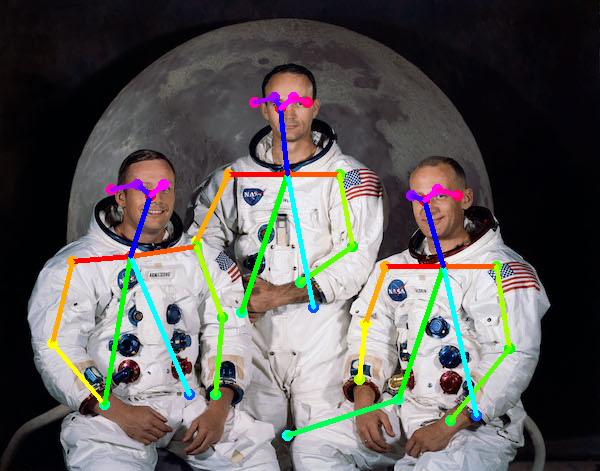

In [9]:
Image.fromarray(img)